<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/World_Cheese_Awards(World's_Cheesiest_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d ericsims/world-cheese-awards-worlds-cheesiest-dataset

  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 28.9MB/s]


In [5]:
!ls

kaggle.json  sample_data  world-cheese-awards-worlds-cheesiest-dataset.zip


In [6]:
!unzip world-cheese-awards-worlds-cheesiest-dataset.zip

Archive:  world-cheese-awards-worlds-cheesiest-dataset.zip
  inflating: .gitignore              
  inflating: README.md               
  inflating: build_cheese_dataset.ipynb  
  inflating: world_cheese_awards_2021.csv  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
cheese = pd.read_csv('/content/world_cheese_awards_2021.csv')
cheese.head()

,Unnamed: 0,company,product_name,rating,category,country,county
0,0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


In [16]:
cheese.columns = ['Unnamed: 0', 'company', 'product_name', 'rating', 'category', 'country', 'Unamed: country']

In [17]:
del cheese['Unnamed: 0']
del cheese['Unamed: country']

In [18]:
cheese.head()

,company,product_name,rating,category,country
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece
2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands


In [20]:
cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       1741 non-null   object
 1   product_name  1741 non-null   object
 2   rating        1741 non-null   object
 3   category      1741 non-null   object
 4   country       1741 non-null   object
dtypes: object(5)
memory usage: 68.1+ KB


In [21]:
cheese.dropna()

,company,product_name,rating,category,country
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece
2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands
...,...,...,...,...,...
1736,Macroom Buffalo Cheese Products Website,Macroom Buffalo Ricotta 200g,SILVER,5709 - Ricotta made with buffalos' milk,Ireland
1737,Diaccialone Società Agricola Website,Ricotta di Bufala 250g,BRONZE,5709 - Ricotta made with buffalos' milk,Italy
1738,Macroom Buffalo Cheese Products Website,Macroom Buffalo Greek Style Cheese 180g,BRONZE,5710 - Any other buffalo's milk cheese not in ...,Ireland
1739,CILENTO SPA Website,Lactose free Mozzarella di Bufala Campana PDO ...,SILVER,5710 - Any other buffalo's milk cheese not in ...,Italy


In [53]:
count = cheese[['rating']].value_counts() # series 형태
rating_count = pd.DataFrame({'rating': ['BRONZE', 'SILVER', 'GOLD', 'SUPER GOLD'], 
                            'count': [count[0], count[1], count[2], count[3]]}) # 데이터프레임 형태로 변환
rating_count.head() # 값 확인

,rating,count
0,BRONZE,747
1,SILVER,590
2,GOLD,316
3,SUPER GOLD,88


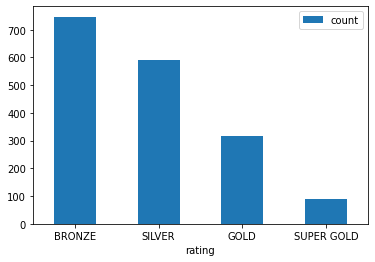

In [54]:
# rating 값 현황 그래프로 확인하기
rating_count.plot.bar(x='rating', y='count', rot=0)

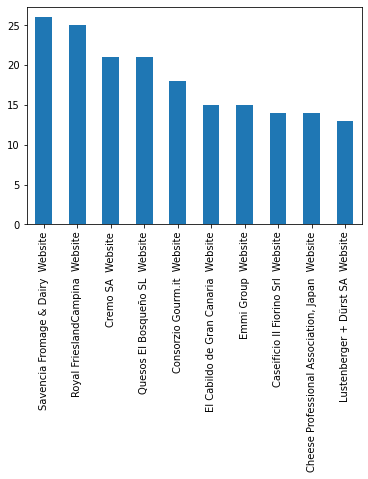

In [72]:
# 제품이 많은 회사 상위 10개 조회
company_10 = cheese['company'].value_counts()[:10]
# 회사 이름
company_index = company_10.index
# count
company_count = company_10[:10]
# 그래프로 표현
company_10.plot.bar(x='company_index', y='company_count', rot=90)

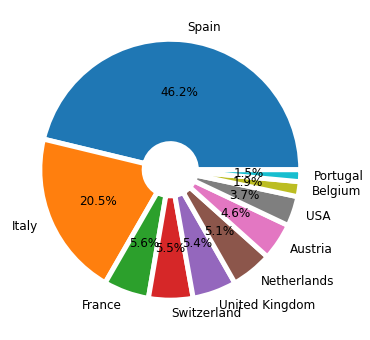

In [107]:
# country 확인
country = cheese['country'].value_counts()

# 상위 10개의 country 항목을 pie chart로 표현
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5} # 부채꼴 스타일 지정
plt.rcParams["figure.figsize"] = (12,6)
plt.pie(country.values[:10], labels=country.index[:10], autopct='%.1f%%', textprops={'fontsize': 12}, wedgeprops=wedgeprops)
plt.show()